In [1]:
import numpy as np
import scipy as sp
import scipy.cluster
import matplotlib.pyplot as pl
import xgboost
import shap
import pandas as pd

/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
#X = X.iloc[:,:4]
model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
model.fit(X, y)

x = X[0:1,:]
refs = X[1:100] # use 100 samples for our background references (using the whole dataset would be slo

In [16]:
raw_df.values[::2, :]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01]])

In [18]:
D = sp.spatial.distance.pdist(X.T, metric="correlation")
cluster_matrix = sp.cluster.hierarchy.complete(D)

In [19]:
cluster_matrix = shap.partition_tree(X)

AttributeError: module 'shap' has no attribute 'partition_tree'

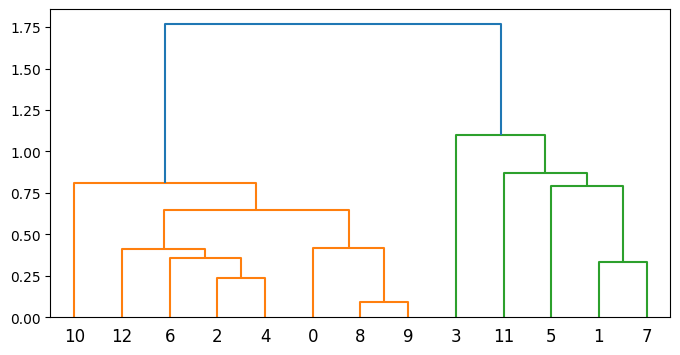

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# sample_text = 'Crossover comfort food with a redemptive twist'
# Z=masker.clustering(sample_text)
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(cluster_matrix)
plt.show()